<a href="https://colab.research.google.com/github/Loomer/2022-itc303-team08/blob/ml-manu/secondModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Cloning repository from github
!git clone -b ml-manu https://github.com/Loomer/2022-itc303-team08


Cloning into '2022-itc303-team08'...
remote: Enumerating objects: 2853, done.
remote: Counting objects: 100% (163/163), done.
remote: Compressing objects: 100% (106/106), done.
remote: Total 2853 (delta 55), reused 162 (delta 54), pack-reused 2690
Receiving objects: 100% (2853/2853), 545.79 MiB | 27.23 MiB/s, done.
Resolving deltas: 100% (155/155), done.
Checking out files: 100% (1424/1424), done.


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
#Importing tensorflow
import tensorflow as tf
print(tf.__version__)

2.8.2


In [4]:
#Importing modules to be used in model development
import matplotlib.pyplot as pypt 
import numpy as np
import cv2
import os 

/content/2022-itc303-team08/images/train/COVID
/content/2022-itc303-team08/images/train/NORMAL
100
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


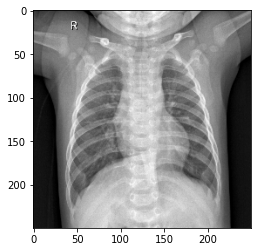

In [ ]:
image_set = "/content/2022-itc303-team08/images/train" #Getting the images for the training set
imageType = ["COVID", "NORMAL"] #Classifying the image set as normal and covid
train_set = []
train_labels = []

#Function for creating training data
def create_train_data():
  for imgType in imageType: 
    x = 0
    link = os.path.join(image_set, imgType) #Creating path for covid and normal lung images
    print(link)
         
    for img in os.listdir(link): 
      if img == "Thumbs.db":
        continue 
      img_array = cv2.imread(os.path.join(link, img)) #Converting image to array  
      new_img_array = cv2.resize(img_array, (250, 250)) #Resizing the image array  
      train_set.append(new_img_array) #Adding array to training set
      train_labels.append(0) #Adding labels to training labels
      x = x + 1
      if (x >= 50):
        break;
        x = 0

#Calling the function to create training data
create_train_data()
print(len(train_set))
pypt.imshow(train_set[99])
print(train_labels)

In [ ]:
second_image_set = "/content/2022-itc303-team08/images/train/INVALID"
for img in os.listdir(second_image_set):
  link = os.path.join(second_image_set, img)
  img_array = cv2.imread(os.path.join(second_image_set, img)) #Converting image to array  
  new_img_array = cv2.resize(img_array, (250, 250)) #Resizing the image array  
  train_set.append(new_img_array) #Adding array to training set
  train_labels.append(1) #Adding labels to training labels

print(len(train_set))
pypt.imshow(train_set[101])
print(train_labels)

/content/2022-itc303-team08/images/train/INVALID/Screenshot 2022-07-21 175938.png
[[[ 1  1  1]
  [ 1  1  1]
  [ 1  1  1]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 1  1  1]
  [ 1  1  1]
  [ 2  2  2]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 1  1  1]
  [ 1  1  1]
  [ 2  2  2]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 ...

 [[ 4  4  4]
  [ 4  4  4]
  [ 4  4  4]
  ...
  [ 6  6  6]
  [ 7  7  7]
  [ 0  0  0]]

 [[ 4  4  4]
  [ 4  4  4]
  [ 4  4  4]
  ...
  [50 50 50]
  [20 20 20]
  [ 2  2  2]]

 [[ 3  3  3]
  [ 3  3  3]
  [ 3  3  3]
  ...
  [30 30 30]
  [ 3  3  3]
  [ 3  3  3]]]
/content/2022-itc303-team08/images/train/INVALID/Screenshot 2022-07-21 185812.png
[[[74 74 74]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[74 74 74]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[74 74 74]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 ...

 [[73 73 73]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0

120
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1]


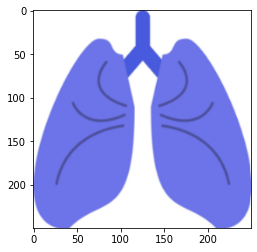

In [ ]:
print(len(train_set))
pypt.imshow(train_set[119])
print(train_labels)

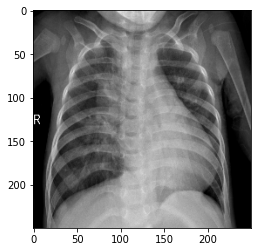

In [ ]:
train_set = np.array(train_set) #Converting training set to numpy array
train_labels = np.array(train_labels) #Converting training labels to numpy array
train_set = train_set/255.0 #Dividing by 255.0 to have the values between 0 and 1
pypt.imshow(train_set[0])

In [ ]:
#Function for creating the model
def create_model():
  model = tf.keras.models.Sequential([ 
    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
    tf.keras.layers.Dense(1, activation=tf.nn.softmax)])

  #Compiling the model
  model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
  
  return model

In [ ]:
#Function for creating the model
def create_model():
  model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(250, 250, 3)), #First layer
    tf.keras.layers.MaxPooling2D(2, 2), #Pooling the pixels
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(250, 250, 3)), #Second layer
    tf.keras.layers.MaxPooling2D(2,2), #Pooling the pixels
    tf.keras.layers.Flatten(), #Flattening the input into a single dimension
    tf.keras.layers.Dropout(0.5), #Dropping out neurons to improve accuracy
    tf.keras.layers.Dense(512, activation=tf.nn.relu), #Dense layer
    tf.keras.layers.Dense(2, activation=tf.nn.softmax)]) #Dense layer

  #Compiling the model
  model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
  
  return model

In [ ]:
#Creating a model
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 248, 248, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 124, 124, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 61, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 238144)            0         
                                                                 
 dropout (Dropout)           (None, 238144)            0

In [ ]:
model.fit(train_set, train_labels, epochs=6)

Epoch 1/6
4/4 [==============================] - 18s 4s/step - loss: 0.7872 - accuracy: 0.7417
Epoch 2/6
4/4 [==============================] - 18s 5s/step - loss: 0.6196 - accuracy: 0.9167
Epoch 3/6
4/4 [==============================] - 18s 5s/step - loss: 0.1779 - accuracy: 0.9417
Epoch 4/6
4/4 [==============================] - 18s 5s/step - loss: 0.0703 - accuracy: 0.9583
Epoch 5/6
4/4 [==============================] - 18s 5s/step - loss: 0.0219 - accuracy: 0.9917
Epoch 6/6
4/4 [==============================] - 18s 4s/step - loss: 0.0086 - accuracy: 1.0000


In [13]:
def is_grey_scale(image):
    count = 0
    img = image.convert('RGB')
    w, h = img.size
    for i in range(w):
        for j in range(h):
            r, g, b = img.getpixel((i,j))
            count = count + 1
            if r != g != b: 
                count = count + 0

    if count > 100:
        return count            
    else:
        return True

In [14]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(250, 250))

  answer = is_grey_scale(img)
  print(answer)

  test_image = image.img_to_array(img)
  test_image = np.expand_dims(test_image, axis=0)
  

"""
  images = np.vstack([test_image])
  prediction = model.predict(images)
  print(fn)
  print(prediction)
  print(type(prediction))

  print([np.argmax(prediction[0])])"""

Saving normal_image_2.png to normal_image_2 (2).png
62500


'\n  images = np.vstack([test_image])\n  prediction = model.predict(images)\n  print(fn)\n  print(prediction)\n  print(type(prediction))\n\n  print([np.argmax(prediction[0])])'